### Pergunta a ser respondida
<p> Quanto vale o aluguel da sua casa?</p>

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Confiração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração no Matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

### Exploração dos dados

In [3]:
# Lendo os dados
base_dados = pd.read_csv('data/house_data.csv')

In [4]:
# Dimensão
base_dados.shape

(10692, 13)

In [5]:
# Verificando os dados
base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
# Removendo colunas
base_dados.drop(columns=['fire insurance (R$)','total (R$)'], inplace=True)

In [7]:
base_dados.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)'],
      dtype='object')

In [8]:
# Analisar campos vazios
base_dados.isnull().sum().sort_values( ascending=False )

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [9]:
# Campo unicos
base_dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [10]:
# Tipos das columns
base_dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

In [11]:
base_dados.dtypes.value_counts()

int64     7
object    4
dtype: int64

### Exploração Analítica (EDA)

In [12]:
# Filtar os tipos de dados
colunas_categoricas = base_dados.columns[base_dados.dtypes == object ]
colunas_numericas = base_dados.columns[base_dados.dtypes != object ]

In [13]:
colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

### Mudança do modelo no tempo
<p>Por exemplo:</p>
<ul>
<li>No primeiro semestre: 90% das casas aceitava animal.</li>
<li>No segundo semestre: 50% das casas aceitava animal.</li>
    <li><b>Resultado:</b> modif. os padrões da base de dados. == <b>Piorar o resultado do modelo</b></li>
</ul>

#### Fazer uma fotografia da base de dados no TEMPO
<p>Caso a base de dados tenha o tempo, ajudará.</p>
<p>Caso não tenha, faça uma <b>fotografia</b></p>

In [14]:
# Analise dos campos Object
# city
base_dados['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [15]:
# normalize
base_dados['city'].value_counts( normalize=True )
base_dados['city'].value_counts( normalize=True ) * 100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [16]:
# Normalizar todos os campos categóricos
for coluna in colunas_categoricas:
    analise = base_dados[coluna].value_counts( normalize=True ) * 100
    print(coluna)
    print(analise)
    print('')

city
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

floor
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64

animal
acept        77.777778
not acept    22.222222
Name: animal, dtype: float64

furniture
not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64



#### Tirar a fotografia daqui ^

In [17]:
### Correção nos dados de floor

# Ajustando o Andar  .loc (localizando)
base_dados.loc[ base_dados['floor']=='301' ]


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164


In [18]:
# Acessando o índice .iloc
base_dados.iloc[ 2562, 5 ]

'301'

In [19]:
# Ajustando o valor 301 para 30

base_dados.iloc[ 2562, 5 ] = 30

In [20]:
base_dados.iloc[ 2562, 5 ]

30

In [21]:
base_dados['floor'].replace('-',0,inplace=True)

In [22]:
base_dados['floor'].value_counts()

0     2461
1     1081
2      985
3      931
4      748
5      600
6      539
7      497
8      490
9      369
10     357
11     303
12     257
13     200
14     170
15     147
16     109
17      96
18      75
19      53
20      44
21      42
25      25
23      25
22      24
26      20
24      19
27       8
28       6
29       5
32       2
35       1
46       1
30       1
51       1
Name: floor, dtype: int64

In [23]:
# Ajustar o '-'
base_dados['floor'] = base_dados['floor'].apply( lambda Registro: 0 if Registro == '-' else Registro)

In [24]:
base_dados['floor'].value_counts()

0     2461
1     1081
2      985
3      931
4      748
5      600
6      539
7      497
8      490
9      369
10     357
11     303
12     257
13     200
14     170
15     147
16     109
17      96
18      75
19      53
20      44
21      42
25      25
23      25
22      24
26      20
24      19
27       8
28       6
29       5
32       2
35       1
46       1
30       1
51       1
Name: floor, dtype: int64

In [25]:
base_dados['floor'] = pd.to_numeric(base_dados['floor'])

In [26]:
base_dados['floor'].dtypes

dtype('int64')

In [27]:
base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [28]:
base_dados['floor'].value_counts(normalize=True)

0     0.230172
1     0.101104
2     0.092125
3     0.087074
4     0.069959
5     0.056117
6     0.050412
7     0.046483
8     0.045829
9     0.034512
10    0.033389
11    0.028339
12    0.024037
13    0.018706
14    0.015900
15    0.013749
16    0.010195
17    0.008979
18    0.007015
19    0.004957
20    0.004115
21    0.003928
25    0.002338
23    0.002338
22    0.002245
26    0.001871
24    0.001777
27    0.000748
28    0.000561
29    0.000468
32    0.000187
35    0.000094
46    0.000094
30    0.000094
51    0.000094
Name: floor, dtype: float64

In [29]:
len(colunas_numericas)

7

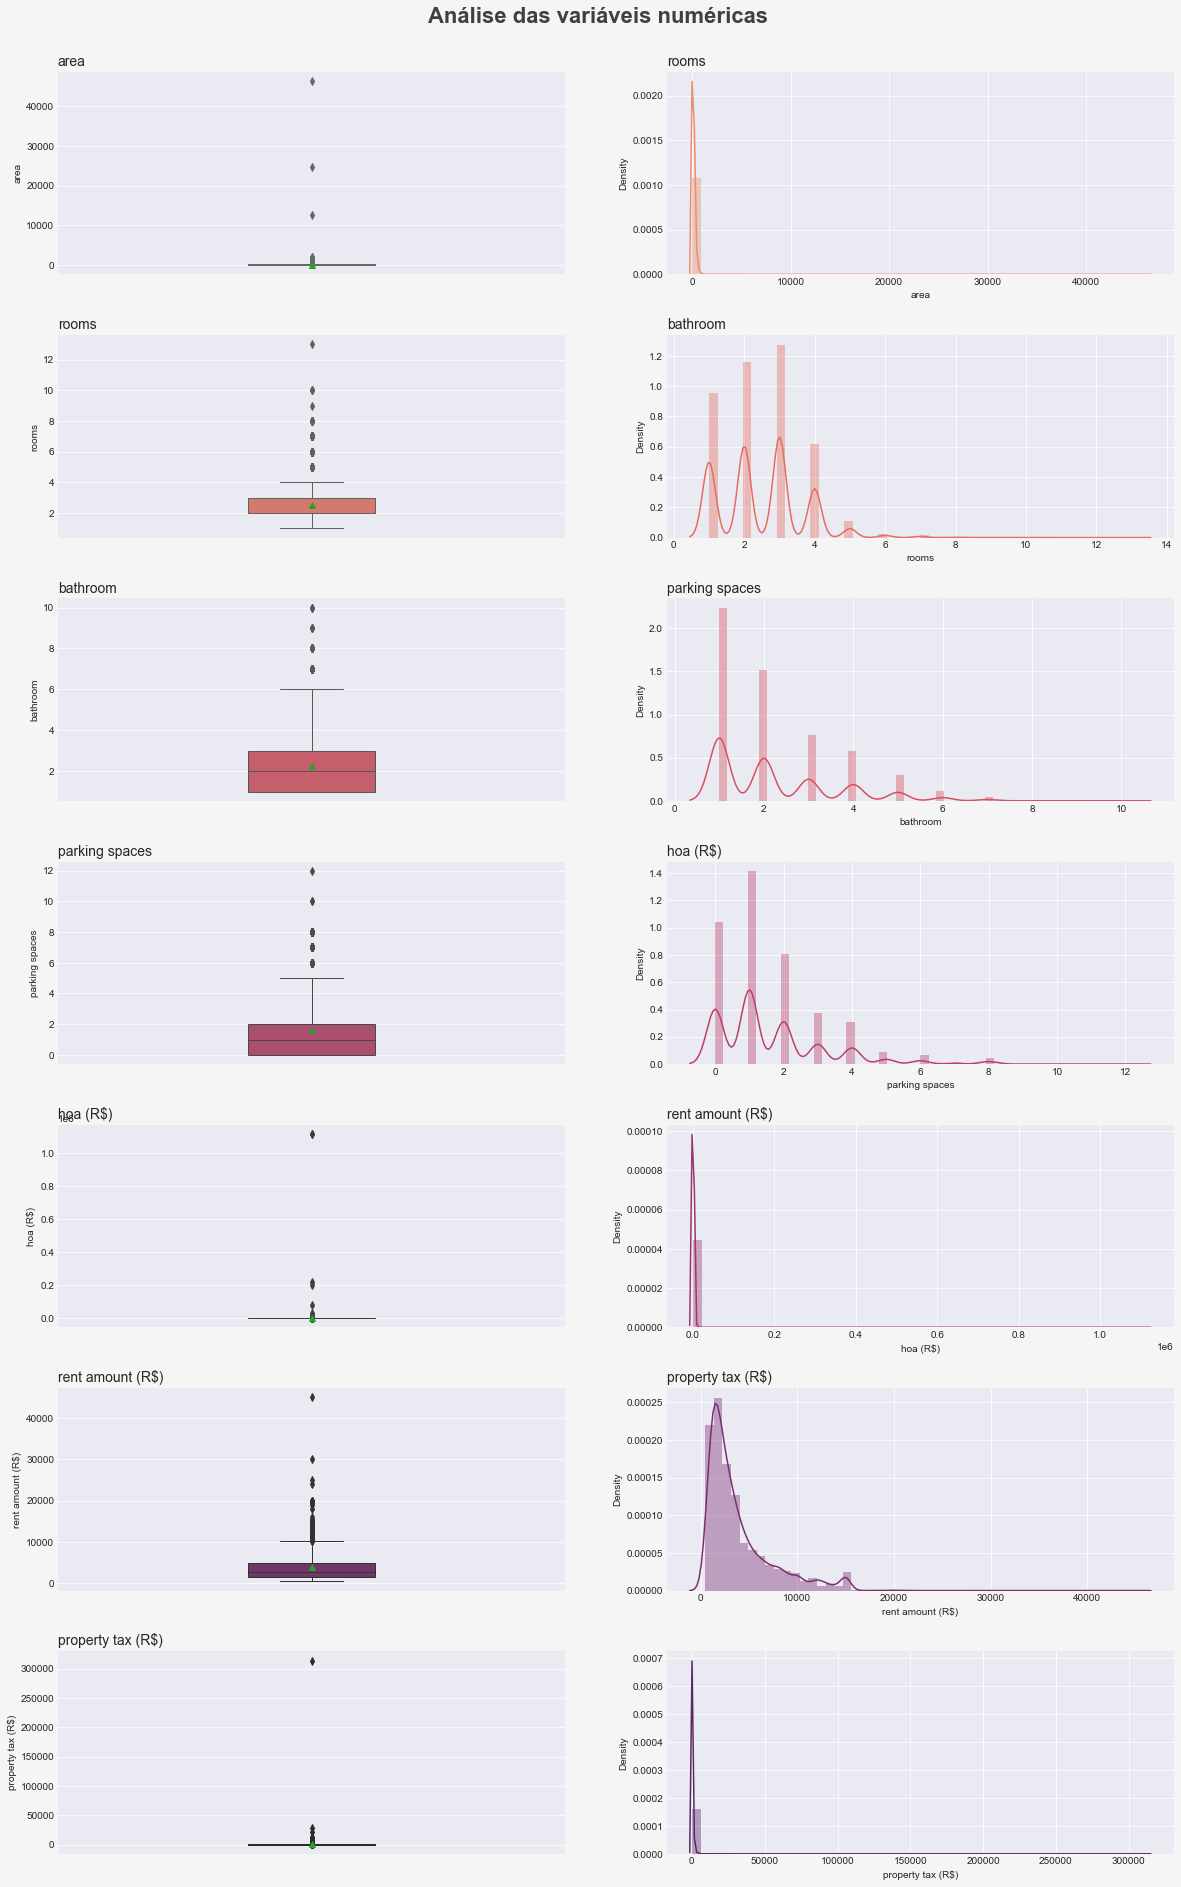

In [30]:
# Grid Gráficos

# Tamanho
Figura, Eixo = plt.subplots( figsize=(20, 30) )

# Cor de fundo
Cor_fundo = '#f5f5f5'
Figura.set_facecolor( Cor_fundo )

# Paleta de cores
paleta_cores = sns.color_palette('flare', len(colunas_numericas) * 2)

# Título
plt.suptitle('Análise das variáveis numéricas', fontsize=22, color='#404040', fontweight=600)

# Estrutura 
linhas =  7 # (Todas as infos. numéricas)
colunas = 2 # (Boxplot - Distplot)
posicao = 1 # Posição inicial do Grid

#Loop para Plotar os dados
for coluna in colunas_numericas:
    
    #Plot no Grid -- Boxplot
    # Título
    plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200)
    
    plt.subplot( linhas, colunas, posicao )
    
    #Boxplot
    sns.boxplot( data=base_dados, y=coluna, showmeans=True, saturation=0.75, linewidth=1,\
                color=paleta_cores[posicao], width=0.25 )
    posicao += 1
        
    # Título
    plt.title( f'{coluna}', loc='left', fontsize=14, fontweight=200)

    # Plot no Grid -- Distplot
    plt.subplot( linhas, colunas, posicao )
    
    # Distplot
    sns.distplot( base_dados[coluna], color=paleta_cores[posicao-1] )

    posicao += 1
    
# Ajuste de Grid
plt.subplots_adjust( top=0.95, hspace=0.3 )
    

In [31]:
base_dados['area'].sort_values(ascending=False)

2397    46335
5915    24606
9241    12732
8790     2000
5129     2000
        ...  
6695       15
1588       13
4864       13
6784       12
785        11
Name: area, Length: 10692, dtype: int64

In [32]:
base_dados.loc[base_dados['area'] <= 10000]['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

<BarContainer object of 10689 artists>

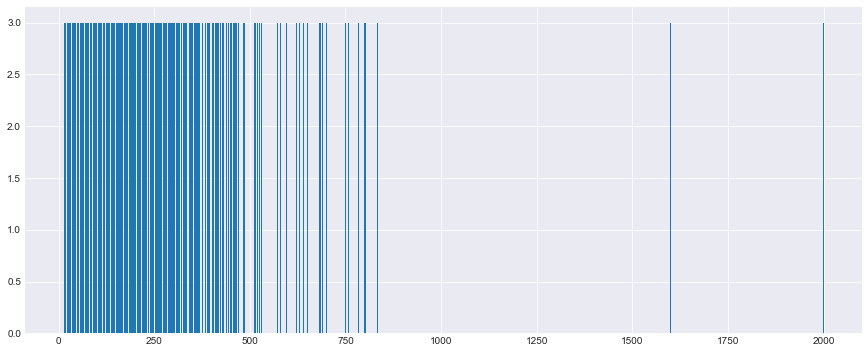

In [33]:
plt.bar(base_dados.loc[base_dados['area'] <= 10000]['area'],height=3)

In [34]:
base_dados['hoa (R$)'].sort_values(ascending=False)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
          ...   
5818           0
5821           0
5832           0
5845           0
10691          0
Name: hoa (R$), Length: 10692, dtype: int64

In [35]:
base_dados.loc[ base_dados['hoa (R$)'] <= 10000]['hoa (R$)'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

In [36]:
base_dados.loc[ base_dados['hoa (R$)'] < 10000]['hoa (R$)'].sort_values(ascending=False)

547      9900
7020     9500
7679     9000
1862     8600
1072     8500
         ... 
3758        0
6317        0
1811        0
6316        0
10691       0
Name: hoa (R$), Length: 10681, dtype: int64

In [37]:
base_dados.iloc[ 974 ]

city                 São Paulo
area                       600
rooms                        6
bathroom                     7
parking spaces               4
floor                        0
animal                   acept
furniture            furnished
hoa (R$)                 10000
rent amount (R$)         15000
property tax (R$)           84
Name: 974, dtype: object

In [38]:
base_dados['rent amount (R$)'].sort_values(ascending=False)

2182     45000
7748     30000
6947     25000
2619     24000
1743     20000
         ...  
8070       500
7502       500
5152       500
4022       460
10627      450
Name: rent amount (R$), Length: 10692, dtype: int64

In [39]:
base_dados.iloc[ 6947 ]

city                     São Paulo
area                           486
rooms                            8
bathroom                         4
parking spaces                   6
floor                            0
animal                       acept
furniture            not furnished
hoa (R$)                         0
rent amount (R$)             25000
property tax (R$)             2200
Name: 6947, dtype: object

In [40]:
base_dados['property tax (R$)'].sort_values(ascending=False)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
          ...  
7790          0
2179          0
7794          0
2173          0
7661          0
Name: property tax (R$), Length: 10692, dtype: int64

In [41]:
base_dados.iloc[6645]

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object

### Engenharia de Features
<p>Quais variáveis vamos levar para o modelo.</p>

#### Ajuste das colunas Categóricas

In [42]:
colunas_categoricas

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [43]:
base_dados['animal']

0            acept
1            acept
2            acept
3            acept
4        not acept
           ...    
10687    not acept
10688        acept
10689    not acept
10690        acept
10691        acept
Name: animal, Length: 10692, dtype: object

In [44]:
### .map

In [45]:
base_dados['animal'] = base_dados['animal'].map({'acept':1, 'not acept':0})
base_dados['furniture'] = base_dados['furniture'].map({'furnished':1, 'not furnished':0})

#### Filtrar a Cidade de São Paulo
<p> <b>MVP</b> (Produto Mínimo Viável) -> VALOR para o Cliente </p>
<p> Escalar o modelo.</p>

In [46]:
base_dados['animal'].head()

0    1
1    1
2    1
3    1
4    0
Name: animal, dtype: int64

In [47]:
# Filtrar a cidade de SP
filtro_sp = base_dados.loc[base_dados['city'] == 'São Paulo']

# Verificar 
filtro_sp.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [48]:
filtro_sp.describe(include="all")

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
count,5887,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,São Paulo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,158.899439,2.558859,2.467641,1.877527,5.626465,0.761339,0.270596,1169.627994,4652.793783,495.701716
std,NaN,347.474169,1.166365,1.503060,1.687973,6.056361,0.426302,0.444306,4076.461180,3634.612007,4153.618928
min,NaN,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
25%,NaN,59.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2000.000000,37.000000
50%,NaN,106.000000,3.000000,2.000000,1.000000,4.000000,1.000000,0.000000,665.000000,3400.000000,170.000000
75%,NaN,212.000000,3.000000,4.000000,3.000000,9.000000,1.000000,1.000000,1608.500000,6000.000000,550.000000


In [49]:
# Drop coluna city
help(base_dados.drop)
filtro_sp.drop(['city'], axis=1, inplace=True)
# base_dados.drop( columns=['city'], inplace=True )

Help on method drop in module pandas.core.frame:

drop(labels=None, axis: 'Axis' = 0, index=None, columns=None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'str' = 'raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the `user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equiv

In [50]:
filtro_sp.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal',
       'furniture', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)'],
      dtype='object')

#### Separar os dados

In [51]:
caracteristicas = filtro_sp.drop('rent amount (R$)', axis=1)
previsor = filtro_sp['rent amount (R$)']

In [52]:
caracteristicas.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal',
       'furniture', 'hoa (R$)', 'property tax (R$)'],
      dtype='object')

In [53]:
type(caracteristicas)

pandas.core.frame.DataFrame

In [54]:
caracteristicas.shape, previsor.shape

((5887, 9), (5887,))

#### Correlação dos dados
<ul>
<li>Correlação <b>positiva</b>: Um sobe o outro tbm sobe. Ex: Idade e salário.</li>
<li>Correlação <b>negativa</b>: Um sobe e o outro desce. Ex: Dólar e real.</li>
</ul>


In [56]:
filtro_sp.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


### Correlação em modo gráfico com yellowbrick

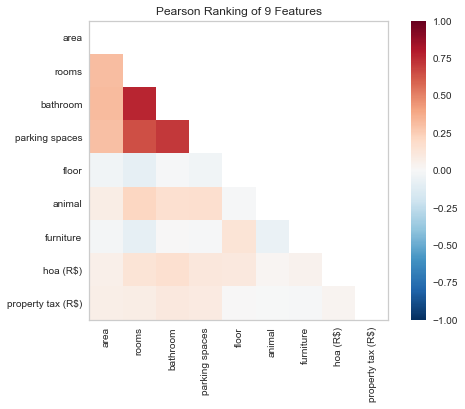

In [58]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o modelo
correlacao = Rank2D( algoritmo='pearson' )

# Filtrar função
correlacao.fit( caracteristicas, previsor )
correlacao.transform( caracteristicas )
correlacao.show();


### Separar dados em Teste e Treino

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_treino, x_test, Y_treino, y_test = train_test_split(
    caracteristicas, previsor, test_size=0.2, random_state=10
)

In [61]:
print(f'Dados de treino: {x_treino.shape[0]}')
print(f'Dados de treino: {x_test.shape[0]}')

Dados de treino: 4709
Dados de treino: 1178
